<a href="https://colab.research.google.com/github/flatplanet/Pytorch-Tutorial-Youtube/blob/main/simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network using PyTorch

In [47]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [92]:
# Create a Model Class that inherits nn.Module 
# 3 hidden layers 
# 9, 8 ,7 neurons fully connected
class Model(nn.Module):
    def __init__(self, inLayer=41, h1=9, h2=8, h3=7, out_features=5):    
        super().__init__()
        self.fc1 = nn.Linear(inLayer, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)  
        self.out = nn.Linear(h3, out_features) 
        
    def forward(self,x):   
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        
        x = self.out(x)
        
        return x



In [93]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model(inLayer=41, h1=9, h2=8, h3=7, out_features=5)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#reading and cleaning the data
my_df = pd.read_csv('cars.csv')
my_df['carbody'].to_dict()

my_df = my_df.drop(['car_ID', 'CarName'], axis=1)

my_df['carbody'] = my_df['carbody'].replace('convertible', 0)
my_df['carbody'] = my_df['carbody'].replace('hatchback', 1)
my_df['carbody'] = my_df['carbody'].replace('sedan', 2)
my_df['carbody'] = my_df['carbody'].replace('wagon', 3)
my_df['carbody'] = my_df['carbody'].replace('hardtop', 4)

encode_fueltype = pd.get_dummies(my_df['fueltype'], prefix='fueltype')
my_df = pd.concat([my_df, encode_fueltype], axis=1)
my_df.drop('fueltype', axis=1, inplace=True)

encode_aspiration = pd.get_dummies(my_df['aspiration'], prefix='aspiration')
my_df = pd.concat([my_df, encode_aspiration], axis=1)
my_df.drop('aspiration', axis=1, inplace=True)

my_df['doornumber'] = my_df['doornumber'].replace('two', 2)
my_df['doornumber'] = my_df['doornumber'].replace('four', 4)

encode_drive = pd.get_dummies(my_df['drivewheel'], prefix='drivewheel')
my_df = pd.concat([my_df, encode_drive], axis=1)
my_df.drop('drivewheel', axis=1, inplace=True)

encode_location = pd.get_dummies(my_df['enginelocation'], prefix='enginelocation')
my_df = pd.concat([my_df, encode_location], axis=1)
my_df.drop('enginelocation', axis=1, inplace=True)

encode_type = pd.get_dummies(my_df['enginetype'], prefix='enginetype')
my_df = pd.concat([my_df, encode_type], axis=1)
my_df.drop('enginetype', axis=1, inplace=True)

my_df['cylindernumber'] = my_df['cylindernumber'].replace('two', 2)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('three', 3)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('four', 4)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('five', 5)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('six', 6)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('eight', 8)
my_df['cylindernumber'] = my_df['cylindernumber'].replace('twelve', 12)

encode_fuelsystem = pd.get_dummies(my_df['fuelsystem'], prefix='fuelsystem')
my_df = pd.concat([my_df, encode_fuelsystem], axis=1)
my_df.drop('fuelsystem', axis=1, inplace=True)

#convert boolean datatypes to binary
my_df = my_df.astype({col: 'int' for col in my_df.dtypes[my_df.dtypes == 'bool'].index})

y = my_df['carbody']
y = y.values

my_df = my_df.drop('carbody', axis=1)

pd.set_option('display.max_columns', 50)  
my_df


,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
201,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
202,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
203,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [52]:
#use this to analyze column datatypes
print(len(my_df.columns))
print(my_df.columns)

X = my_df.values


41
Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')


In [53]:
print(X)
print(y)

[[ 3.0000000e+00  2.0000000e+00  8.8600000e+01  1.6880000e+02
   6.4100000e+01  4.8800000e+01  2.5480000e+03  4.0000000e+00
   1.3000000e+02  3.4700000e+00  2.6800000e+00  9.0000000e+00
   1.1100000e+02  5.0000000e+03  2.1000000e+01  2.7000000e+01
   1.3495000e+04  0.0000000e+00  1.0000000e+00  1.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.0000000e+00
   1.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00
   0.0000000e+00]
 [ 3.0000000e+00  2.0000000e+00  8.8600000e+01  1.6880000e+02
   6.4100000e+01  4.8800000e+01  2.5480000e+03  4.0000000e+00
   1.3000000e+02  3.4700000e+00  2.6800000e+00  9.0000000e+00
   1.1100000e+02  5.0000000e+03  2.1000000e+01  2.7000000e+01
   1.6500000e+04  0.0000000e+00  1.0000000e+00  1.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  1.00

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)


In [65]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [66]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [98]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [99]:
# Train our model!
# Epochs? (one run thru all the training data in our network)

epochs = 1000
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 54.26387023925781
Epoch: 10 and loss: 51.074684143066406
Epoch: 20 and loss: 48.03929138183594
Epoch: 30 and loss: 45.14249038696289
Epoch: 40 and loss: 42.39303207397461
Epoch: 50 and loss: 39.82853698730469
Epoch: 60 and loss: 37.43389129638672
Epoch: 70 and loss: 35.18328857421875
Epoch: 80 and loss: 33.01894760131836
Epoch: 90 and loss: 30.932395935058594
Epoch: 100 and loss: 28.9105167388916
Epoch: 110 and loss: 26.94255256652832
Epoch: 120 and loss: 25.134817123413086
Epoch: 130 and loss: 23.493804931640625
Epoch: 140 and loss: 21.991609573364258
Epoch: 150 and loss: 20.615467071533203
Epoch: 160 and loss: 19.426218032836914
Epoch: 170 and loss: 18.36389923095703
Epoch: 180 and loss: 17.434432983398438
Epoch: 190 and loss: 16.59950065612793
Epoch: 200 and loss: 15.82784366607666
Epoch: 210 and loss: 15.10631275177002
Epoch: 220 and loss: 14.426375389099121
Epoch: 230 and loss: 13.79682731628418
Epoch: 240 and loss: 13.20353889465332
Epoch: 250 and loss: 12.6575

Text(0.5, 0, 'Epoch')

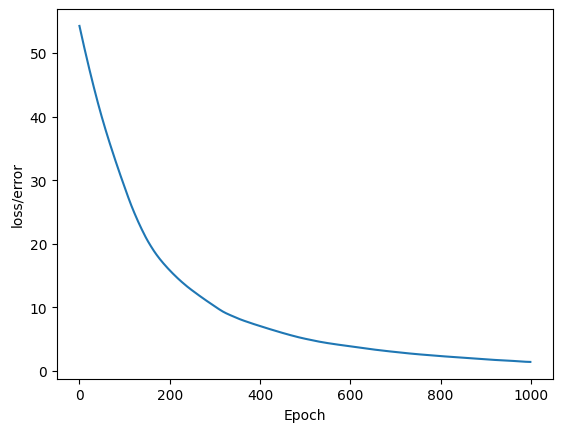

In [100]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [101]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error

In [102]:
loss

tensor(1.3120)

In [104]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "convertible"
    elif y_test[i] == 1:
      x = 'hatchback'
    elif y_test[i] == 2:
      x = 'sedan'
    elif y_test[i] == 3:
      x = 'wagon'
    elif y_test[i] == 4:
      x = 'hardtop'

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()} ')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([1.0613, 3.4180, 3.7659, 1.4625, 1.6060]) 	 1 	 2 
2.)  tensor([ 3.4761, -2.9293,  3.9178,  2.0426,  3.7151]) 	 2 	 2 
3.)  tensor([2.2758, 8.8076, 7.4644, 1.2111, 1.8608]) 	 1 	 1 
4.)  tensor([1.0214, 3.1010, 3.6140, 1.5358, 1.6860]) 	 4 	 2 
5.)  tensor([0.7527, 2.4969, 2.9238, 1.3180, 1.2583]) 	 2 	 2 
6.)  tensor([2.0811, 7.6398, 6.8053, 1.3926, 2.0117]) 	 2 	 1 
7.)  tensor([ 12.6526, -15.0408,  12.3639,   9.3628,  13.7594]) 	 2 	 4 
8.)  tensor([1.9028, 6.2621, 6.1346, 1.7022, 2.3445]) 	 1 	 1 
9.)  tensor([1.1335, 3.3687, 3.9053, 1.6195, 1.8546]) 	 2 	 2 
10.)  tensor([1.0480, 3.1610, 3.6824, 1.5574, 1.7285]) 	 2 	 2 
11.)  tensor([0.3453, 1.5810, 1.8777, 0.9877, 0.6099]) 	 2 	 2 
12.)  tensor([0.7366, 2.4607, 2.8826, 1.3049, 1.2327]) 	 4 	 2 
13.)  tensor([2.2541, 7.8268, 7.2057, 1.6268, 2.4146]) 	 3 	 1 
14.)  tensor([1.0827, 3.2390, 3.7715, 1.5856, 1.7837]) 	 3 	 2 
15.)  tensor([ 14.6851, -19.0365,  15.1104,  11.6230,  16.3472]) 	 2 	 4 
16.)  tensor([0.5005, 1.

In [105]:
torch.save(model.state_dict(), 'car_nn.pt')